<a href="https://colab.research.google.com/github/tracedence/Data-analysis/blob/main/Principle_component_anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [45]:
cancer_df = load_breast_cancer()
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
df = pd.DataFrame(cancer_df["data"], columns=cancer_df["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
df.shape

(569, 30)

In [48]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [49]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)

In [52]:
scaled_df.shape

(569, 30)

In [53]:
x_pca = pca.fit_transform(scaled_df)
x_pca.shape

(569, 2)

## pca has represented 30 dimension data into 2 dimension space in vector space

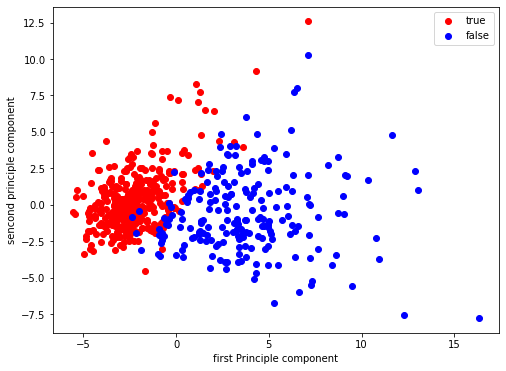

In [63]:
plt.figure(figsize=(8,6))
pca_df = pd.DataFrame(x_pca)
pca_df["target"] = cancer_df["target"]
pca_df_1 = pca_df[pca_df["target"] == 1]
pca_df_0 = pca_df[pca_df["target"] == 0]
plt.scatter(pca_df_1[0], pca_df_1[1], c="red", label="true")
plt.scatter(pca_df_0[0], pca_df_0[1], c="blue", label="false")
plt.xlabel("first Principle component")
plt.ylabel("sencond principle component")
plt.legend()